--- Training Logistic Regression ---

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4650
           1       0.98      0.99      0.99      4330

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


--- Training Random Forest ---

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4650
           1       1.00      1.00      1.00      4330

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980


--- Training SVM ---

--- DEBUG: SVM Predictions Sample ---
[0 0 0 1 0 1 1 1 0 0]

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      

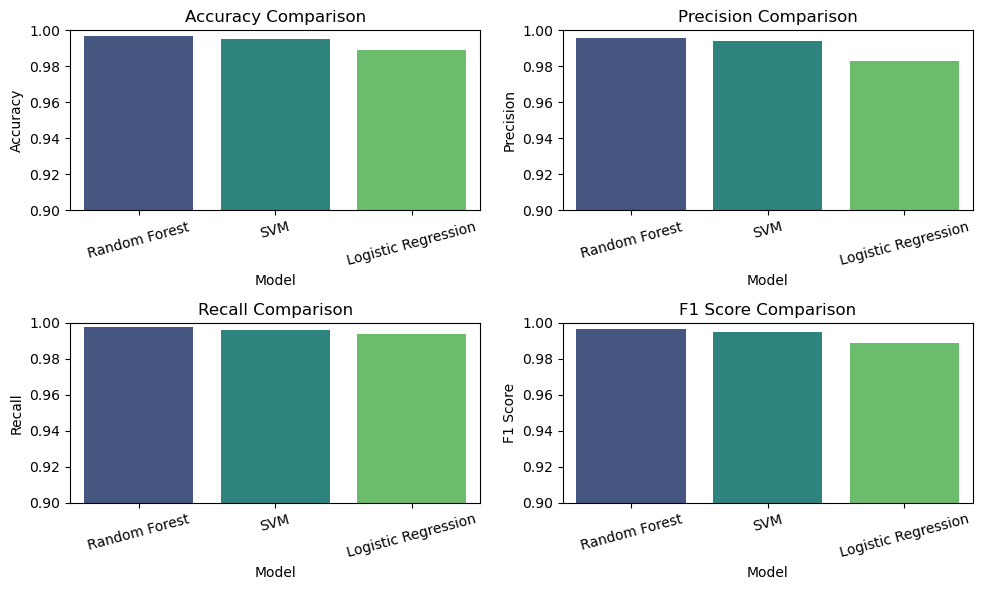

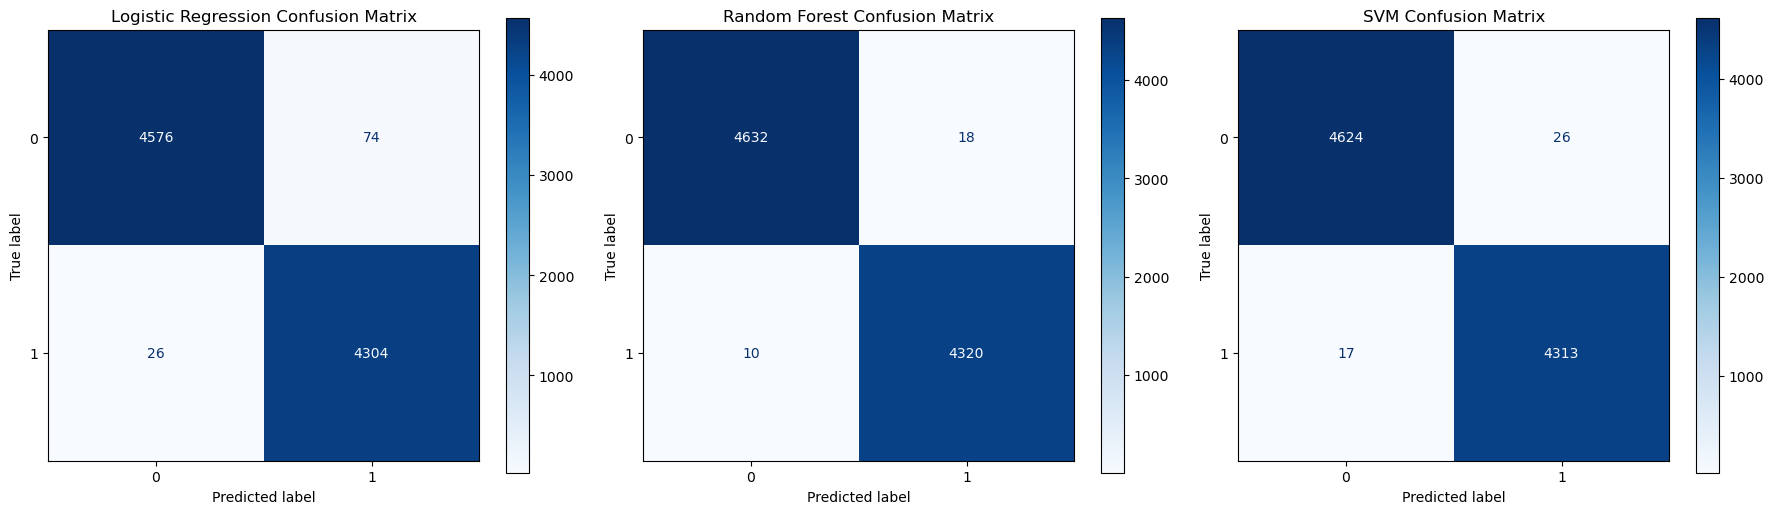

In [7]:
# Step 1: Imports
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import warnings
warnings.filterwarnings("ignore")

# Step 2: Load Preprocessed Data
df = pd.read_csv("../data/preprocessed/cleaned.csv")
X = df['clean_text'].fillna('')
y = df['label']

# Step 3: TF-IDF Vectorization (fit ONCE before split)
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(X)

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)

# Step 5: Define Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": LinearSVC()
}

# Step 6: Training, Prediction, and Evaluation
results = []
conf_matrices = {}

for name, model in models.items():
    print(f"--- Training {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Debug SVM Predictions
    if name == "SVM":
        print("\n--- DEBUG: SVM Predictions Sample ---")
        print(y_pred[:10])

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    print(f"\n{name} Classification Report:\n{classification_report(y_test, y_pred)}\n")

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })
    conf_matrices[name] = confusion_matrix(y_test, y_pred)
# Step 7: Display Comparison
comparison_df = pd.DataFrame(results)
comparison_df = comparison_df.sort_values(by="Accuracy", ascending=False)
print("✅ Model Comparison:")
print(comparison_df)

# --- Plot Metrics ---
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i+1)
    sns.barplot(x='Model', y=metric, data=comparison_df, palette='viridis')
    plt.title(f'{metric} Comparison')
    plt.ylim(0.9, 1)
    plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

# --- Plot Confusion Matrices ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (name, cm) in zip(axes, conf_matrices.items()):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=ax, cmap='Blues', values_format='d')
    ax.set_title(f'{name} Confusion Matrix')

plt.tight_layout()
plt.show()